# RNN
Recurrent Neural Network

### Import the required packages

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as KL
import matplotlib.pyplot as plt

### Get the dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

### Create the model

In [5]:
inputs = KL.Input(shape=(28, 28))
x = KL.SimpleRNN(64, activation='relu')(inputs)
outputs = KL.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",
 loss="sparse_categorical_crossentropy",
 metrics=["acc"])

### Training the model

In [7]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5860 - acc: 0.8100
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2598 - acc: 0.9251
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2086 - acc: 0.9394
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1854 - acc: 0.9466
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1679 - acc: 0.9520


### Plotting the accuracy and loss

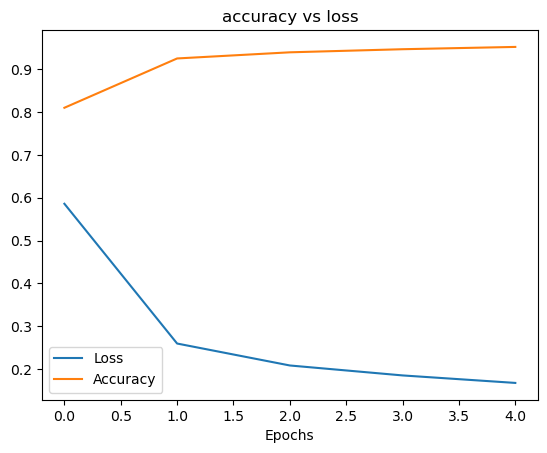

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title("accuracy vs loss")
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])

### Printing the metrics

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1367 - acc: 0.9613
Loss: 0.13669994473457336 - Acc: 0.9613000154495239
